<a href="https://colab.research.google.com/github/Apofice2/3313/blob/main/GradSto_(version_interme%CC%81diaire)_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algorithmes de gradient pour l'apprentissage automatique

Dans le cadre de ce TP, on propose d'implémenter les algorithmes de gradient (stochastiques) les plus utilisés dans le cadre de la phase d'apprentissage de nombreux modèles paramétriques; dont les réseaux de neurones. On s'intéressera également des algorithmes adaptatifs en s'appuyant notamment sur des outils de visualisation des "trajectoires" générées.

$\textbf{Référence générale}$ : https://ruder.io/optimizing-gradient-descent/

## 1. Fonctions de coût

Afin d'illustrer ces propriétés, on considérera successivement plusieurs fonctions objectifs.

### 1.1 Fonction de coût élémentaire

On utilisera par exemple la fonction dite de "Beale" qui fait partie des fonctions de test classiques en optimisation.

$$
J(\theta_0, \theta_1)=(1.5− \theta_0+\theta_0 \theta_1)^2+(2.25−\theta_0+\theta_0 \theta_1^2)^2+(2.625−\theta_0+\theta_0 \theta_1^3)^2
$$

$ \textbf{Question 1 :}$

a) Déterminer explicitement le gradient $\nabla J (\theta)$.

b) Implémenter les deux fonctions $\texttt{beale}$  et $\texttt{beale}\_\texttt{grad}$

c) Représenter (à l'aide de fonctions de $\texttt{matplotlib}$) les lignes de niveau ainsi que le champ de gradient associés à $J$.

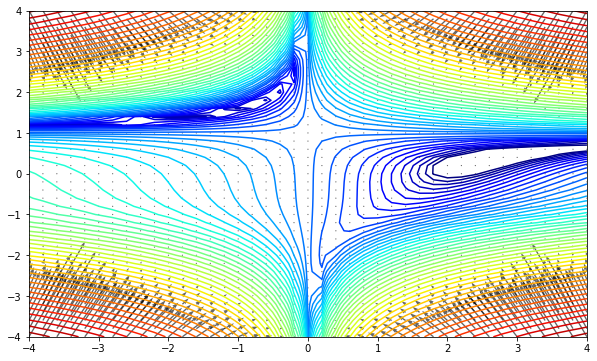

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

## Définition des fonctions

def beale(x,y):
    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

def beale_grad(x,y):
    temp1=1.5-x+x*y
    temp2=2.25-x+x*y**2
    temp3=2.625-x+x*y**3
    dJd0=2*((y-1)*temp1+(y**2-1)*temp2+(y**3-1)*temp3)
    dJd1=2*(x*temp1 + 2*x*y*temp2 + 3 *x*(y**2)*temp3)
    return dJd0, dJd1

## Représentation graphique

fig, ax = plt.subplots(figsize=(10, 6))

xmin, xmax, xstep = -4, 4, .2
ymin, ymax, ystep = -4, 4, .2

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

z = beale(x, y)
g = beale_grad(x,y)

ax.contour(x, y, z, levels=np.logspace(0, 5, 50), norm=LogNorm(), cmap=plt.cm.jet)

ax.quiver(x, y, x-g[0], x-g[1], angles='xy', color='k',alpha=0.6)



### 1.2 Formalisme ERM (Empirical Risk Minimization)

On note dans la suite $J: \mathbb{R}^p \rightarrow \mathbb{R}$ la fonction de coût que l'on cherche à minimiser.

L'argument $\theta \in \mathbb{R}^p$ de la fonction $J$ représente typiquement les paramètres du modèle : les poids et biais des différents neurones par exemple.

Dans le cadre d'un problème typique d'$\textbf{apprentissage supervisé}$, la fonction de coût $J(\theta)$ possède souvent une forme spécifique
$$ J(\theta) = \frac{1}{m} \sum_{k=1}^m r_k(\theta; x^{(k)}, y^{(k)}),$$
où $\left( x^{(k)}, y^{(k)} \right)_{1 \leq k \leq m}$ est le dataset sous-jascent et $r_k(\theta;x^{(k)},y^{(k)})$ est une mesure de l'erreur/coût pour l'échantillon $(x^{(k)},y^{(k)})$.

$J$ représente un risque empirique et la minimisation de $J$ est donc comprise comme un problème de minimisation de risque empirique (ERM).

C'est un point important dans la mesure où $\textbf{l'algorithme du gradient stochastique présenté ci-dessous repose sur cette forme spécifique}$.

### 1.3 Régression linéaire

Afin d'illustrer dans la suite le formalisme ERM sous-jascent, on utilisera un problème simple : celui de la $\textbf{régression linéaire}$.

$ \textbf{Question 3 :}$ Pour un problème de régression linéaire, la Mean Square Error (MSE) correspond à

$$r_k(\theta;x,y)=r(\theta; x,y) := (y- \theta_1 x - \theta_0)^2$$

a) Quelle est la fonction de coût globale $J$ pour un problème de régression linéaire simple lorsqu'on dispose de $2$ échantillons $(x^{(1)},y^{(1)})$ et $(x^{(2)},y^{(2)})$ ?

b) Donner une formule explicite de $\nabla J (\theta) $  dans ce cas.

$ \textbf{Question 4 :}$

a) Implémenter les deux fonctions $\texttt{msr}$ (Mean Square Regression) et $\texttt{grad}\_ \texttt{msr}$

b) Représenter (à l'aide de fonctions de $\texttt{matplotlib}$) les lignes de niveau ainsi que le champ de gradient associés à $J$ pour les échantillons

$$(1,5),(2,6),(5,15), (8,16), (15,11), (20,40)$$

[[ 689.16666667  670.52666667  652.20666667 ...  205.80666667
   199.32666667  193.16666667]
 [ 637.265       619.305       601.665      ...  179.745
   173.945       168.465     ]
 [ 587.76        570.48        553.52       ...  156.08
   150.96        146.16      ]
 ...
 [ 401.76        408.96        416.48       ...  900.32
   919.68        939.36      ]
 [ 440.93166667  448.81166667  457.01166667 ...  965.33166667
   985.37166667 1005.73166667]
 [ 482.5         491.06        499.94       ... 1032.74
  1053.46       1074.5       ]]


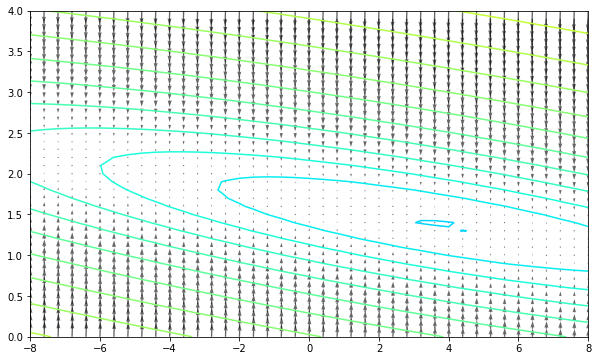

In [ ]:
## Définition des fonctions

## On fixe les échantillons

x = np.array([1, 2, 5, 8, 15, 20])
y = np.array([5, 6, 15, 16, 11, 40])

#x = np.linspace(0,50,100)
#y = x+10*np.random.randn(100)

def msr(theta0,theta1,x,y):
    l=len(x)
    temp=0
    for i in range(l):
        temp+=(theta0+theta1*x[i] -y[i])**2
    return 1.0/ l *temp

def msr_grad(theta0,theta1,x,y):
    l=len(x)
    temp1=0
    temp2=0
    for i in range(l):
        temp=2*(theta0+theta1*x[i]-y[i])
        temp1+=temp
        temp2+=x[i]*temp
    return temp1/l, temp2/l

## Représentation graphique

fig, ax = plt.subplots(figsize=(10, 6))

theta0_min, theta0_max, theta0_step = -8.0, 8.0, 0.4
theta1_min, theta1_max, theta1_step = 0.0, 4.0, 0.1

theta0, theta1 = np.meshgrid(np.arange(theta0_min, theta0_max + theta0_step, theta0_step), np.arange(theta1_min, theta1_max + theta1_step, theta1_step))


z = msr(theta0,theta1,x,y)
g = msr_grad(theta0,theta1,x,y)

print(z)

ax.contour(theta0, theta1, z, levels=np.logspace(0, 5, 40), norm=LogNorm(), cmap=plt.cm.jet)

ax.quiver(theta0, theta1, theta0-g[0], theta1-g[1], angles='xy', color='k',alpha=0.6)


## 2. Descente de gradient standard

### 2.1 Implémentations

Un algorithme de descente de gradient "classique" $\textbf{à pas constant}$ dans ce cadre est un algorithme itératif défini par

$$ \theta_{0} \in \mathbb{R}^p \ \ \mbox{et} \ \ \theta_{n+1} = \theta_{n} - \eta g_{n}, $$

où $g_{n}= \nabla J \left(\theta_{n} \right)$ est le gradient de $J$ évalué au "temps" $n$ et $\eta$ est le taux d'apprentissage (le pas $t$ de l'optimisation -> voir Bases d'optimisation).

$\textbf{Question 5 :}$ Implémenter une fonction $\texttt{gradient}\_ \texttt{std}$ qui réalise une descente de gradient standard pour une fonction de coût $J(\theta)$.

Remarque : la fonction en question doit renvoyer $\textbf{la liste des vecteurs}$ $(\theta_n)_{n \leq N}$ générés par l'algorithme.




In [ ]:
def gradient_std(dJ, theta_init, eta=0.01, N=100, tol=1e-06):
    traj=[np.array(theta_init)]
    theta = theta_init
    for _ in range(N):
        D_theta = -eta * np.array(dJ(theta[0],theta[1]))
        if np.all(np.abs(D_theta) <= tol):
            break
        theta += D_theta
        traj.append(np.array(theta))
    return traj

$\textbf{Question 6 :}$ Implémenter une fonction $\texttt{gradient}\_ \texttt{std}\_ \texttt{ERM}$ qui réalise une descente de gradient standard pour une ERM $J(\theta; x,y)$ faisant intervenir les échantillons $\texttt{x}=(x^{(k)})_{1 \leq k \leq m}$ et $\texttt{y}=(y^{(k)})_{1 \leq k \leq m}$

Remarque : Il s'agit essentiellement de la même fonction que la précédente; on ajoute simplement le data set aux paramètres.

In [ ]:
def gradient_std_ERM(dJ, x, y, theta_init, eta=0.01, N=100, tol=1e-06):
    traj=[np.array(theta_init)]
    theta = theta_init
    for _ in range(N):
        D_theta = -eta * np.array(dJ(theta[0],theta[1],x,y))
        if np.all(np.abs(D_theta) <= tol):
            break
        theta += D_theta
        traj.append(np.array(theta))
    return traj


### 2.2 Illustration graphique

$\textbf{Question 7 :}$ Représenter graphiquement la suite $(\theta_n)_{n \in \mathbb{N}}$ générée par un algorithme de gradient standard pour le problème de minimisation de la fonction de beale avec $\theta_0 = (-2.5,2.5)$.

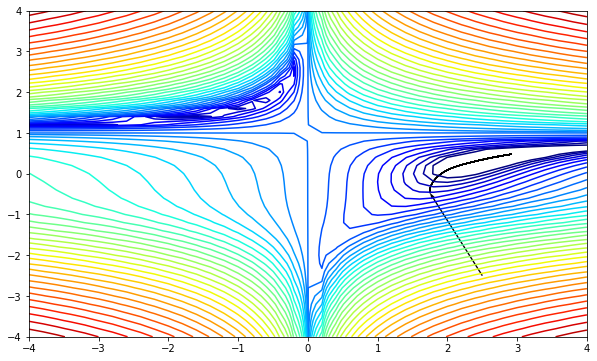

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

theta0_min, theta0_max, theta0_step = -4.0, 4.0, 0.2
theta1_min, theta1_max, theta1_step = -4.0, 4.0, 0.2

theta0, theta1 = np.meshgrid(np.arange(theta0_min, theta0_max + theta0_step, theta0_step), np.arange(theta1_min, theta1_max + theta1_step, theta1_step))

## Lignes de niveaux

z = beale(theta0,theta1)
ax.contour(theta0, theta1, z, levels=np.logspace(0, 5, 40), norm=LogNorm(), cmap=plt.cm.jet)

## Création des trajectoires

theta_init= [2.5, -2.5]
path=gradient_std(beale_grad, theta_init, eta=0.0005, N=10000, tol=1e-08)
path_=np.array(path).T

## Représentation des trajectoires

ax.quiver(path_[0,:-1], path_[1,:-1], path_[0,1:]-path_[0,:-1], path_[1,1:]-path_[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')


$\textbf{Question 8 :}$ Représenter graphiquement la suite $(\theta_n)_{n \in \mathbb{N}}$ générée par un algorithme de gradient standard pour le problème de régression linéaire décrit dans le cadre des questions 3 et 4.

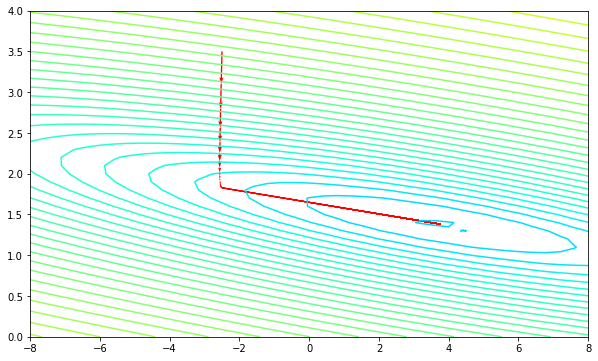

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

theta0_min, theta0_max, theta0_step = -8.0, 8.0, 0.4
theta1_min, theta1_max, theta1_step = 0.0, 4.0, 0.1

theta0, theta1 = np.meshgrid(np.arange(theta0_min, theta0_max + theta0_step, theta0_step), np.arange(theta1_min, theta1_max + theta1_step, theta1_step))

## Lignes de niveaux

z = msr(theta0,theta1,x,y)
ax.contour(theta0, theta1, z, levels=np.logspace(0, 5, 100), norm=LogNorm(), cmap=plt.cm.jet)

## Création des trajectoires

theta_init= [-2.5, 3.5]
path=gradient_std_ERM(msr_grad, x, y, theta_init, eta=0.001, N=10000, tol=1e-08)
path_=np.array(path).T

## Représentation des trajectoires

ax.quiver(path_[0,:-1], path_[1,:-1], path_[0,1:]-path_[0,:-1], path_[1,1:]-path_[1,:-1], scale_units='xy', angles='xy', scale=1, color='r')

### 2.3 Aparté : un outil de visulation pour les méthodes de scipy.optimize

On peut utiliser une construction similaire pour produire une représentation graphique de tous les algorithmes de $\texttt{scipy.optimize}$; certains ayant été étudiés dans le cadre du module "Bases d'optimisation".

On illustre la démarche dans le cas de l'implémentation $\texttt{scipy.optimize}$ du gradient conjugué.


In [ ]:
pip install autograd

In [ ]:
from autograd import value_and_grad
from scipy.optimize import minimize

$\texttt{Autograd}$ est une librairie Python qui permet l'évaluation efficace de gradient via la $\textbf{différentiation automatique}$. L'appel à $\texttt{value}\_\texttt{and}\_\texttt{grad}$ permet de construire une "fonctionnelle" qui regroupe la fonction valeur et son gradient. Un tel argument est impliqué dans l'appel à $\texttt{minimize}$ via la méthode de gradient conjugué.

In [ ]:
theta_init = np.array([2.5, -2.5])

F = value_and_grad(lambda args: beale(*args))

def make_minimize_(path=[]):

    def minimize_(xk):
        path.append(np.copy(xk))

    return minimize_

path = [theta_init]

res = minimize(F, x0=theta_init, method='Newton-CG',jac=True, tol=1e-8, callback=make_minimize_(path))
path_ = np.array(path).T

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

theta0_min, theta0_max, theta0_step = -4.0, 4.0, 0.2
theta1_min, theta1_max, theta1_step = -4.0, 4.0, 0.2

theta0, theta1 = np.meshgrid(np.arange(theta0_min, theta0_max + theta0_step, theta0_step), np.arange(theta1_min, theta1_max + theta1_step, theta1_step))


z = beale(theta0,theta1)

ax.contour(theta0, theta1, z, levels=np.logspace(0, 5, 40), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path_[0,:-1], path_[1,:-1], path_[0,1:]-path_[0,:-1], path_[1,1:]-path_[1,:-1], scale_units='xy',scale=1, angles='xy', color='k')

## 3. L'algorithme du gradient stochastique

$\textbf{Référence}$ : Large scale machine learning with stochastic gradient descent, L. Bottou, 2011

### Gradient stochastique : version online

Dans la description précédente, le gradient utilisé pour la direction de descente est calculé à partir de la fonction de coût globale; qui tient compte de tous les exemples / échantillons du data-set.

Dans le cas de l'algorithme de gradient stochastique, les directions de descente sont calculées à partir des $r_k(\theta; x^{(k)}, y^{(k)})$ pour $1 \leq k \leq m$ individuellement et successivement.

$\textbf{Algorithme Online}$

$\textbf{I)}$ on opère une permutation aléatoire des $(x^{(k)}, y^{(k)})_{1 \leq k \leq m}$

$\textbf{II)}$ pour $1 \leq k \leq m$, on pose $\theta \leftarrow \theta - \eta \nabla r_k( \theta; x^{(k)}, y^{(k)} )$

$\textbf{...}$ Et on itère jusqu'à ce qu'à obtenir une approximation satisfaisante.

La $\textbf{différence fondamentale avec le gradient standard}$ est que la direction de descente est celle du gradient de l'erreur associée aux échantillons successifs $\nabla r_k( \theta; x^{(k)}, y^{(k)} )$ et non celle du gradient de l'erreur globale $\nabla J(\theta)$


### Gradient stochastique : version mini-batch

Il s'agit d'une version intermédiaire entre le gradient standard et le gradient stochastique online. Les gradients ne sont plus calculés individuellement mais "par paquets" ou batch. On divise le data set en $K$ paquets de tailles $L$ (idéalement $m=KL$).

La direction de descente du $k$-ième paquet ($1 \leq k \leq K$) est donnée par

$$
d_k:=\nabla \left( \frac{1}{L} \sum_{\ell=1}^L r( \theta; x^{(k,\ell)}, y^{(k,\ell)} ) \right)
$$

$\textbf{Algorithme mini-batch}$

$\textbf{I)}$ Génération aléatoire des paquets/ batchs $(x^{(k,\ell)}, y^{(k,\ell)})_{1 \leq k,\ell \leq K,L}$

$\textbf{II)}$ pour $1 \leq k \leq m$, on pose $\theta \leftarrow \theta - \eta d_k$

$\textbf{...}$ Et on itère jusqu'à ce qu'à obtenir une approximation satisfaisante.


 ### Implémentation


$\textbf{Question 9:}$ Proposer une implémentation de l'algorithme du gradient stochastique avec $\textbf{paramétrage de la taille du mini-batch}$.

In [ ]:

    def SGD(dJ, x, y, theta_init, eta=0.004, batch_size=1, N=1000, tol=1e-8):
    m = x.shape[0]
    ## Tableau concaténé selon les colonnes
    xy = np.c_[x.reshape(m, 1), y.reshape(m, 1)]
    ## Initialisation du générateur aléatoire
    rng = np.random.default_rng(seed=12345)

    traj=[np.array(theta_init)]
    theta = theta_init

    for _ in range(N): ## boucle sur les époques
        rng.shuffle(xy) ## mélange du dataset -> modifie xy
        for ind_init in range(0,m,batch_size): ## boucle sur les lots
            ind_end = ind_init + batch_size
            ## Extraction des valeurs de x et y pour le lot courant x_temp, y_temp
            ## On récupère les valeurs de x_temp et y_temp à partir du tableau mélangé xy
            x_temp = xy[ind_init:ind_end, :-1]
            y_temp = xy[ind_init:ind_end, -1:]
            ## Calcul de l'incrément à partir de x_temp,y_temp et non de x,y
            D_theta=-eta*np.array(dJ(theta[0],theta[1],np.ravel(x_temp),np.ravel(y_temp)))
            ## Test sur l'incrément -> sortie de la boucle
            if np.all(np.abs(D_theta) <= tol):
                break
            theta += D_theta ## Mise à jour du paramètre

            traj.append(np.array(theta)) ## ajout de la dernière valeur à la trajectoire
    return traj



$\textbf{Question 10 :}$ Représenter graphiquement les suites $(\theta_n)_{n \in \mathbb{N}}$ générées par  l'algorithme de gradient stochastique pour le problème de régression détaillé ci-dessus pour $\textbf{différentes tailles de batch}$.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

theta0_min, theta0_max, theta0_step = -8.0, 8.0, 0.4
theta1_min, theta1_max, theta1_step = 0.0, 4.0, 0.1

theta0, theta1 = np.meshgrid(np.arange(theta0_min, theta0_max + theta0_step, theta0_step), np.arange(theta1_min, theta1_max + theta1_step, theta1_step))

## Lignes de niveaux

z = msr(theta0,theta1,x,y)
ax.contour(theta0, theta1, z, levels=np.logspace(0, 5, 40), norm=LogNorm(), cmap=plt.cm.jet)

## Création des trajectoires

theta_init= [-2.5, 3.5]

## Seule modification par rapport aux représentations précédentes
## Tester batch_size=1,2,3,6

path=SGD(msr_grad, x, y, theta_init, eta=0.002, batch_size=6, N=10000, tol=1e-8)

path_=np.array(path).T

## Représentation des trajectoires

ax.quiver(path_[0,:-1], path_[1,:-1], path_[0,1:]-path_[0,:-1], path_[1,1:]-path_[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')

On observe que l'amplitude du bruit est directement liée à la taille de batch. Lorsque la taille du batch est égale au nombre total d'éléments dans le dataset modèle (ici 6 éléments), aucun bruit n'est observé.

## 4. Approche de type Momentum

### 4.1  Momentum classique

$\textbf{Référence}$ : On the moment term in gradient descent algorithms, Qian N., 1999

La méthode Momentum a deux objectifs : améliorer la vitesse de convergence et réduire les oscillations propres aux méthodes de gradient stochastique classique. Elle est caractérisée par l'itération suivante
$$
\left\{
\begin{array}{ccl}
v_{n+1} &=& \gamma v_{n} - \eta \nabla J ( \theta_{n}) \\
\theta_{n+1} &=& \theta_{n} -  v_{n+1}
\end{array}
\right.
$$
La variable $v_{n}$ peut s'interpréter comme une vitesse. C'est sur cette variable que porte la mise à jour liée au gradient.



$\textbf{Question 11:}$ Proposer une implémentation de l'algorithme "Momentum" avec possible paramétrage de la taille du mini-batch.

$\textbf{Question 12 :}$

a) Représenter graphiquement les suites $(\theta_n)_{n \in \mathbb{N}}$ générées par  la version stochastique de l'algorithme "momentum classique" pour le problème de régression détaillé ci-dessus, pour $\textbf{différentes tailles de batch}$.

b) Comparer ces trajectoires avec celles produites par la méthode du gradient stochastique standard

Observations attendues :

-réduction des oscillations

-accélération de la convergence

### 4.2 Nesterov Accelerated Gradient (NAG)

$\textbf{Référence}$ : A method for unconstrained convex minimization problem with the rate of convergence o(1/k2), Nesterov Y., 1983

Cette méthode peut-être appréhendée comme une "amélioration" de la méthode momentum.

$$
\left\{
\begin{array}{ccl}
v_{n+1} &=& \gamma v_{n} - \eta \nabla J ( \color{red}{\theta_{n} - \gamma v_n } ) \\
\theta_{n+1} &=& \theta_{n} -  v_{n+1}
\end{array}
\right.
$$

Différence principale : on évalue le gradient en $\theta_{n} - \gamma v_n \approx \theta_{n+1}$ et non en $\theta_{n}$ !


$\textbf{Question 13:}$ Proposer une implémentation de l'algorithme "NAG" avec possible paramétrage de la taille du mini-batch.

$\textbf{Question 14 :}$

a) Représenter graphiquement les suites $(\theta_n)_{n \in \mathbb{N}}$ générées par  la version stochastique de l'algorithme "NAG" pour le problème de régression détaillé ci-dessus, pour $\textbf{différentes tailles de batch}$.

b) Comparer ces trajectoires avec celles produites par la méthode momentum implémentée précédemment

## 5. Algorithmes adaptatifs

Le principe des algorithmes présentés dans cette section est simple : il s'agit d'adapter le taux d'apprentissage aux directions privilégiées (ou préalablement explorées) dans l'espace des paramètres.

Parmi les algorithmes les plus utilisés : Adagrad, Adadelta, RMSprop, Adam, NAdam, RAdam, AMSgrad, ....

On propose d'examiner et implémenter trois exemples.

### 5.1  Adagrad

$\textbf{Référence}$ : Adaptive Subgradient Methods for Online Learning and Stochastic Optimization, Duschi, Hazan and Singer, 2011

$\textbf{Question 15:}$ Proposer une implémentation de l'algorithme "Adagrad" avec possible paramétrage de la taille du mini-batch.

$\textbf{Question 16 :}$ Représenter graphiquement les suites $(\theta_n)_{n \in \mathbb{N}}$ générées par  la version stochastique de l'algorithme "NAG" pour le problème de régression détaillé ci-dessus, pour $\textbf{différentes tailles de batch}$.

Observations attendues :

-forte diminution du taux d'apprentissage

-régularisation des trajectoires

### 5.2 RMSprop

$\textbf{Référence}$ : RmsProp: Divide the gradient by a running average of its recent magnitude, Tielman T. and Hilton G., 2012


$\textbf{Question 17:}$ Proposer une implémentation de l'algorithme "RMSprop" avec possible paramétrage de la taille du mini-batch.

$\textbf{Question 18 :}$

a) Représenter graphiquement les suites $(\theta_n)_{n \in \mathbb{N}}$ générées par  la version mini-batch de l'algorithme "RMSprop" pour le problème de régression pour $\textbf{différentes tailles de batch}$.

b) Comparer ces trajectoires avec celles produites par la méthode Adagrad

### 5.4 AMSgrad

$\textbf{Référence}$ : On the convergence of Adam and Beyond, Reddi S.J. , Kale S.  and Kumar S.

$\textbf{Question 19:}$ Proposer une implémentation de l'algorithme "AMSgrad" avec possible paramétrage de la taille du mini-batch.

In [ ]:
def AMSgrad(grad, x, y, theta0, eta=0.1, gamma=0.0, batch_size=1, N=100, tol=1e-2):
    ....

## Pour aller plus loin

Pour l'analyse de convergence des algorithmes adaptatifs

-le cadre de https://arxiv.org/abs/1412.6980 (qui introduit Adam) est très utilisé; attention la preuve de convergence contient des "approximations"

-pour une analyse de cette preuve et la présentation d'AMSgrad, on consultera https://arxiv.org/abs/1904.09237

Pour une comparaison des performances des différents algorithmes dans le cadre de la calibration des modèles de Deep Learning, on pourra consulter :

https://arxiv.org/pdf/2007.01547.pdf ainsi que ses références.

La conception et l'analyse de nouveaux algorithmes d'optimisation pour l'apprentissage est un thème actuel de recherche. Parmi les propositions récentes, on pourra s'intéresser par exemple à RANGER

https://lessw.medium.com/new-deep-learning-optimizer-ranger-synergistic-combination-of-radam-lookahead-for-the-best-of-2dc83f79a48d


In [ ]:
import numpy as np

x=np.random.rand(4,2)
print(x)
rng = np.random.default_rng(seed=123)
rng.shuffle(x)
print(x)

[[0.26265919 0.84741403]
 [0.53840017 0.63451207]
 [0.85392089 0.62787287]
 [0.57196605 0.64501229]]
[[0.26265919 0.84741403]
 [0.85392089 0.62787287]
 [0.57196605 0.64501229]
 [0.53840017 0.63451207]]
